## **Exercise 1**

1.1 Consider some continuous random variables generated from an unknown distribution stored in 'clean_data.npy'. Fit a univariate Gaussian distribution to this data and estimate the mean and variance of the Gaussian distribution using the maximum likelihood estimator. Report the estimated mean and variance for the Gaussian distribution and plot its probability density function for continuous random variables in the range $[-10, 20]$. Overlay this probability density function curve on the normalised histogram of the data.

**(5 marks)**


Mean of the distribution: 5.027152443622421
Standard Deviation of the distribution: 3.004774087810028
Variance of the distribution: 9.028667318774586


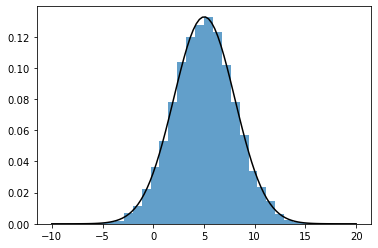

In [64]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

data = np.load('clean_data.npy').flatten()

mean, std = norm.fit(data)

plt.hist(data, bins=25, density=True, alpha=0.7)
x = np.linspace(-10, 20, 100)
y = norm.pdf(x, loc=mean, scale=std)
plt.plot(x, y, color='black')

variance = std ** 2
print("Mean of the distribution:", mean)
print("Standard Deviation of the distribution:", std)
print("Variance of the distribution:", variance)

plt.show()

1.2 Next, consider a 'corrupted' version of the data used in the previous exercise, stored in 'corrupted_data.npy'. This new data is affected by some degree of outliers from an unknown source. Repeat the process of fitting a univariate Gaussian distribution to this new data (using MLE) and report the estimated mean and variance of the distribution. Plot its probability density function for continuous random variables in the range $[-10, 35]$. Overlay this probability density function curve on the normalised histogram of the new data (affected by outliers). Comment on how the new Gaussian distribution parameters estimated have changed relative to the previous values estimated in exercise 1.1, and why.

**(5 marks)**

Mean of the distribution: 6.614508398212064
Standard Deviation of the distribution: 5.79757338228899
Variance of the distribution: 33.61185712302579


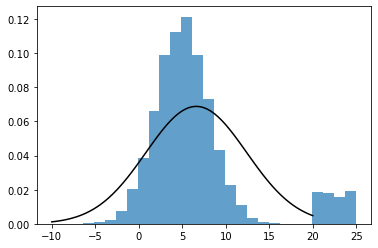

In [65]:
data = np.load('corrupted_data.npy').flatten()

mean, std = norm.fit(data)

plt.hist(data, bins=25, density=True, alpha=0.7)
x = np.linspace(-10, 20, 100)
y = norm.pdf(x, loc=mean, scale=std)
plt.plot(x, y, color='black')

variance = std ** 2
print("Mean of the distribution:", mean)
print("Standard Deviation of the distribution:", std)
print("Variance of the distribution:", variance)

plt.show()

## Comment on how new Gaussian Distribution parameters estimated have changed
The mean, standard deviation and variance of new Gaussian Distribution estimated are greater than the previous values estimated in exercise 1.1. Gaussian distribution using MLE is sensitive to outliers or noise. The outliers, which has larger value compared to the majority values, pull the mean towards their values, which subsequently causes the standard deviation to be more spread out.

1.3 Fit a distribution to the corrupted data from exercise 1.2 in a manner that is robust to the outliers present. Demonstrate this robustness by comparing the probability density functions of the robust and univariate Gaussian distribution for the corrupted data. Additionally compare the mean and variance estimated for both the clean data (from exercise 1.1) and the corrupted data (from exercise 1.2) based on the robust fit. Explain briefly, how your chosen approach to fitting a robust distribution to the corrupted data achieves robustness.

**(5 marks)**

Mean of Student's t-distribution: 5.19913884945735
Standard Deviation of Student's t-distribution: 2.647356804210874
Variance of Student's t-distribution: 7.008498048801613


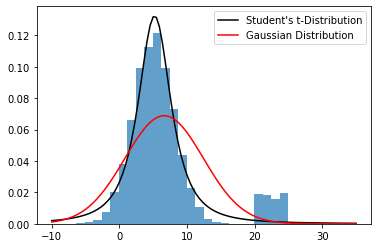

In [66]:
from scipy.stats import t

data = np.load('corrupted_data.npy')

df, mean, std = t.fit(data.flatten())

plt.hist(data.flatten(), bins=25, density=True, alpha=0.7)
x = np.linspace(-10, 35, 100)
y = t.pdf(x, df, loc=mean, scale=std)
plt.plot(x, y, color='black', label='Student\'s t-Distribution')

mean_norm, std_norm = norm.fit(data)
y_norm = norm.pdf(x, loc=mean_norm, scale=std_norm)
plt.plot(x, y_norm, color='red', label='Gaussian Distribution')

variance = std ** 2
print("Mean of Student's t-distribution:", mean)
print("Standard Deviation of Student's t-distribution:", std)
print("Variance of Student's t-distribution:", variance)
plt.legend()
plt.show()

## Compare the mean and variance based on the robust fit
The mean obtained using Student's t-distribution is closer to the mean of the clean data(from exercise 1.1) compared to the mean of the corrupted data(from exercise 1.2). The standard deviation and variance of the Student's t-distribution is also nearer to the standard deviation and variance of the clean data. It is less spread than the corrupted data. This shows that Student t's distribution is less affected by the presence of outliers compared to Gaussian distribution.
## How student's t-distribution achieves robustness
Student's t-distribution is more robust that Gaussian distribution as it has heavier or longer tails compared to normal distribution. Heavier tails of Student's tail distribution indicates that it has few points closer to the mean compared to Gaussian distribution. In other words, it has more probability density in the tails compared to normal distribution, which makes it to decrease slower than the tail of normal distribution. This will make it less sensitive to the outliers.

References<br>
For question 1.1 and 1.2 <br>
I refer to the lab notebook 'The Central Limit Theorum' and conducted online researches to fit the gaussian distribution to the data.<br>
Shubhanshuarya 2021. How to plot normal distribution over histogram in python? GeeksforGeeks. [Online]. [Accessed 19 November 2023]. Available from: https://www.geeksforgeeks.org/how-to-plot-normal-distribution-over-histogram-in-python/.

For question 1.3, I did online research to find out the best distribution model that can achieve robustness and found out that student's t-distribution is the best model. Student's t-distribution is also mentioned in the lecture about gaussian distribution.<br>
Anon 2017. The students t-distribution in python. Fu-berlin.de. [Online]. [Accessed 19 November 2023]. Available from: https://www.geo.fu-berlin.de/en/v/soga-py/Basics-of-statistics/Continous-Random-Variables/Students-t-Distribution/Students-t-Distribution-in-Python/index.html.<br>
Anon n.d. Statistics in Python: Student’s t-Distributions. Github.io. [Online]. [Accessed 19 November 2023b]. Available from: https://rowannicholls.github.io/python/statistics/distributions/students_t.html.<br>
Anon 2019. Python - Student’s t Distribution in Statistics. GeeksforGeeks. [Online]. [Accessed 19 November 2023]. Available from: https://www.geeksforgeeks.org/python-students-t-distribution-in-statistics/.

# **Exercise 2**

2.1 You are given a data array called "shape_array.npy" that comprises 7 samples organised as columns in the array. Each column vector is a 3D shape of a blood vessel of size $(N\times3)$ that has been reshaped into a vector of size $(N*3 \times 1)$. Perform PCA (using the scikit-learn implementation) of the data array and extract the principal components (eigenvectors), the coordinates of the shapes in the new co-ordinate space defined by the eigenvectors, and the singular values associated with each of the eigenvectors.

**(5 marks)**

In [67]:
from sklearn.decomposition import PCA
import pandas as pd

data_array = np.load('shape_array.npy')

pca = PCA()
transformed_data = pca.fit_transform(data_array)
eigenvectors = pca.components_
explained_variance = pca.explained_variance_

print("Principal Components (Eigenvectors):\n", eigenvectors)
print("Coordinates in the New Co-ordinate Space Defined By The Eigenvectors:\n", transformed_data)
print("Explained Variance:", explained_variance)

Principal Components (Eigenvectors):
 [[-0.38037264 -0.37523067 -0.37719938 -0.37817138 -0.3757472  -0.3805931
  -0.3784029 ]
 [-0.10408945  0.57824534  0.4263103   0.04255044 -0.5881822   0.00175507
  -0.35395616]
 [ 0.16878504  0.5200732  -0.31816143 -0.70664835  0.25168645  0.17260844
  -0.085539  ]
 [-0.19174048  0.06954267 -0.2782519   0.4181922   0.34790245  0.327218
  -0.6913633 ]
 [ 0.19346665  0.24013206 -0.70068085  0.3621036  -0.447494    0.06895197
   0.27898002]
 [ 0.8508169  -0.29065698  0.05269536 -0.04612327 -0.1600954  -0.01326373
  -0.40114623]
 [ 0.13382927  0.32768437 -0.05999389  0.21838728  0.32029986 -0.8446008
  -0.08647633]]
Coordinates in the New Co-ordinate Space Defined By The Eigenvectors:
 [[-5.1103267e-03  3.4574745e-04  6.8627368e-04 ...  1.9254823e-03
  -5.7590788e-04 -9.8215787e-06]
 [ 2.0230768e-02  4.7289883e-03 -2.5007625e-03 ... -9.3818433e-04
  -7.2441812e-06  3.2279358e-04]
 [ 2.4545202e-03  2.9521286e-03  2.5158888e-03 ... -5.7056244e-04
  -1.46

2.2 Next, perform eigendecomposition of the covariance matrix estimated from the given data array. Compare the obtained eigenvalues with the singular values estimated from PCA in the previous step. Report any differences you might find between the two and briefly explain the reason for any differences. Find the new coordinates of each shape (i.e. column in the data array) in the new coordinate space defined by the estimated eigenvectors.

**(5 marks)**

In [68]:
data_array = np.load('shape_array.npy')

covariance_matrix = np.cov(data_array, rowvar=False)

eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)

print("Eigenvalues Obtained From the Eigendecomposition Covariance Matrix:\n", eigenvalues)
print("Explained Variance Estimated From PCA:\n", explained_variance)

new_coordinates = np.dot(data_array-np.mean(data_array), eigenvectors.T)

print("New Coordinates in the New Coordinate Space Defined By the Estimated Eigenvectors:\n", new_coordinates)

Eigenvalues Obtained From the Eigendecomposition Covariance Matrix:
 [3.73037469e-04 3.70862164e-06 1.24675147e-06 3.26716550e-08
 9.81054237e-08 4.68177310e-07 3.71225469e-07]
Explained Variance Estimated From PCA:
 [3.7303747e-04 3.7086229e-06 1.2467503e-06 4.6817757e-07 3.7122538e-07
 9.8105424e-08 3.2671682e-08]
New Coordinates in the New Coordinate Space Defined By the Estimated Eigenvectors:
 [[-4.18109348e-04  2.66785587e-03  4.23907390e-03 ... -6.29982119e-05
  -2.19147642e-03  8.51961379e-04]
 [ 6.23578423e-03 -6.12182713e-03 -1.62225547e-02 ... -3.82571993e-03
   5.00971381e-03 -7.74478408e-03]
 [ 9.26356220e-04  1.39143566e-05 -1.22273161e-03 ... -3.72308031e-03
   2.07867407e-03 -1.02858078e-03]
 ...
 [-2.87310477e-03 -3.01736711e-04  5.57875187e-04 ...  2.38093459e-03
  -7.23066911e-04  1.27991798e-03]
 [ 2.07430211e-03 -2.61013085e-03 -3.66987023e-03 ... -2.71423091e-03
   2.89288515e-03 -3.72055587e-03]
 [ 1.17712489e-02 -1.54315166e-02 -4.49757691e-02 ... -1.04615498e-0

## Differences between explained variance and eigenvalues
Explained variance is presented in descending order while eigenvalues from eigendecomposition is not in descending order. Explained variance, that represents the amount of variance explained by each principal components, is tightly associated with the principal components. Hence, since the principal components follow a descending order, the explained varianced are also presented in descending order.

2.3 Reconstruct any one shape from the provided data array using (a) new coordinates estimated from PCA in 2.1 and (b) the new coordinates estimated using eigendecomposition in 2.2. Reshape the resulting vectors from (a) and (b) into a 3D set of points of size $(N\times3)$ that represent reconstructions of the original shape. Overlay the two resulting shapes and briefly comment on their similarity. Finally, in a couple of sentences explain why PCA is often described as an approach for dimensionality reduction/data compression.

**(5 marks)**

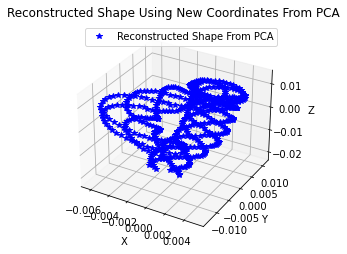

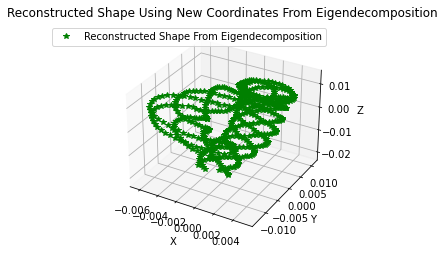

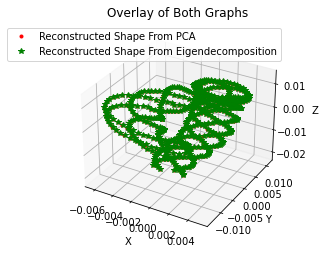

In [88]:
import matplotlib.pyplot as plt

#Reverse the transformation applied during PCA
reconstructed_shape_from_pca = pca.inverse_transform(transformed_data)[:, 0].reshape((-1, 3))

#Reverse the calculation applied during eigendecomposition, but use new coordinates instead of original coordinates
reversed_calculation_from_eigendecomposition = np.dot(new_coordinates + np.mean(data_array) , eigenvectors)
reconstructed_shape_from_eigendecomposition = reversed_calculation_from_eigendecomposition[:, 0].reshape((-1,3))

ax1 = plt.axes(projection='3d')
ax1.plot(reconstructed_shape_from_pca[:, 0], reconstructed_shape_from_pca[:, 1], reconstructed_shape_from_pca[:, 2], 'b*', label='Reconstructed Shape From PCA')
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_zlabel('Z')
ax1.legend()
ax1.set_title('Reconstructed Shape Using New Coordinates From PCA')

eigendec = plt.figure()
ax2 = plt.axes(projection='3d')
ax2.plot(reconstructed_shape_from_eigendecomposition[:, 0], reconstructed_shape_from_eigendecomposition[:, 1], reconstructed_shape_from_eigendecomposition[:, 2], 'g*', label='Reconstructed Shape From Eigendecomposition')
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.set_zlabel('Z')
ax2.legend()
ax2.set_title('Reconstructed Shape Using New Coordinates From Eigendecomposition')

both = plt.figure()
ax3 = plt.axes(projection='3d')
ax3.plot(reconstructed_shape_from_pca[:, 0], reconstructed_shape_from_pca[:, 1], reconstructed_shape_from_pca[:, 2], 'r.', label='Reconstructed Shape From PCA')
ax3.plot(reconstructed_shape_from_eigendecomposition[:, 0], reconstructed_shape_from_eigendecomposition[:, 1], reconstructed_shape_from_eigendecomposition[:, 2], 'g*', label='Reconstructed Shape From Eigendecomposition')
ax3.set_xlabel('X')
ax3.set_ylabel('Y')
ax3.set_zlabel('Z')
ax3.legend()
ax3.set_title('Overlay of Both Graphs')

plt.show()

## Similarity between two shapes
From the overlay graph, we can see both graphs overlap. The reconstructed shape drawn using new coordinates from PCA and eigendecomposition have the same shape. The important feature of the shape is shown in both reconstructed shape.

## Reasons of PCA chosen for dimensionality reduction/data compression
PCA is able to identify and capture the most important features or components in a dataset to reduce the dimensionality of the data. PCA is also able to reduce the noise or measurements error in the dataset by identifying the underlaying patterns or signals. This will compress and reduce the complexity of the dataset, enhancing the efficiency of the computation process.

References<br>
Below are the websites I used to learn PCA, ways to plot a scatter chart, get the covariance matrix of the data array and learn abou the difference between eigenvalues and singular values.<br>
Anon n.d. Numpy.Cov — NumPy v1.26 manual. Numpy.org. [Online]. [Accessed 19 November 2023a]. Available from: https://numpy.org/doc/stable/reference/generated/numpy.cov.html.<br>
Anon n.d. Sklearn.decomposition.PCA. scikit-learn. [Online]. [Accessed 19 November 2023b]. Available from: https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html.<br>
Biswal, A. 2021. What is Principal Component Analysis? Simplilearn.com. [Online]. [Accessed 19 November 2023]. Available from: https://www.simplilearn.com/tutorials/machine-learning-tutorial/principal-component-analysis.<br>
VanderPlas, J. n.d. Three-dimensional plotting in matplotlib. Github.io. [Online]. [Accessed 27 November 2023]. Available from: https://jakevdp.github.io/PythonDataScienceHandbook/04.12-three-dimensional-plotting.html.



# **Exercise 3: Predict Cancer Mortality Rates in US Counties**

The provided dataset comprises data collected from multiple counties in the US. The regression task for this assessment is to predict cancer mortality rates in "unseen" US counties, given some training data. The training data ('Training_data.csv') comprises various features/predictors related to socio-economic characteristics, amongst other types of information for specific counties in the country. The corresponding target variables for the training set are provided in a separate CSV file ('Training_data_targets.csv'). Use the notebooks provided for lab sessions throughout this module to provide solutions to the exercises listed below. Throughout all exercises text describing your code and answering any questions included in the exercise descriptions should be included as part of your submitted solution.


The list of predictors/features available in this data set are described below:

**Data Dictionary**

avgAnnCount: Mean number of reported cases of cancer diagnosed annually

avgDeathsPerYear: Mean number of reported mortalities due to cancer

incidenceRate: Mean per capita (100,000) cancer diagoses

medianIncome: Median income per county

popEst2015: Population of county

povertyPercent: Percent of populace in poverty

MedianAge: Median age of county residents

MedianAgeMale: Median age of male county residents

MedianAgeFemale: Median age of female county residents

AvgHouseholdSize: Mean household size of county

PercentMarried: Percent of county residents who are married

PctNoHS18_24: Percent of county residents ages 18-24 highest education attained: less than high school

PctHS18_24: Percent of county residents ages 18-24 highest education attained: high school diploma

PctSomeCol18_24: Percent of county residents ages 18-24 highest education attained: some college

PctBachDeg18_24: Percent of county residents ages 18-24 highest education attained: bachelor's degree

PctHS25_Over: Percent of county residents ages 25 and over highest education attained: high school diploma

PctBachDeg25_Over: Percent of county residents ages 25 and over highest education attained: bachelor's degree

PctEmployed16_Over: Percent of county residents ages 16 and over employed

PctUnemployed16_Over: Percent of county residents ages 16 and over unemployed

PctPrivateCoverage: Percent of county residents with private health coverage

PctPrivateCoverageAlone: Percent of county residents with private health coverage alone (no public assistance)

PctEmpPrivCoverage: Percent of county residents with employee-provided private health coverage

PctPublicCoverage: Percent of county residents with government-provided health coverage

PctPubliceCoverageAlone: Percent of county residents with government-provided health coverage alone

PctWhite: Percent of county residents who identify as White

PctBlack: Percent of county residents who identify as Black

PctAsian: Percent of county residents who identify as Asian

PctOtherRace: Percent of county residents who identify in a category which is not White, Black, or Asian

PctMarriedHouseholds: Percent of married households

BirthRate: Number of live births relative to number of women in county

In [81]:
import os
import pandas as pd

root_dir = os.getcwd()

training_data_path = os.path.join(root_dir, 'Training_data.csv')
training_targets_path = os.path.join(root_dir, 'Training_data_targets.csv')


**Exercise 3.1**

Read in the training data and targets files. The training data comprises features/predictors while the targets file comprises the targets (i.e. cancer mortality rates in US counties) you need to train models to predict. Plot histograms of all features to visualise their distributions and identify outliers. Do you notice any unusual values for any of the features? If so comment on these in the text accompanying your code. Compute correlations of all features with the target variable (across the data set) and sort them according the strength of correlations. Which are the top five features with strongest correlations to the targets? Plot these correlations using the scatter matrix plotting function available in pandas and comment on at least two sets of features that show visible correlations to each other.

**(5 marks)**

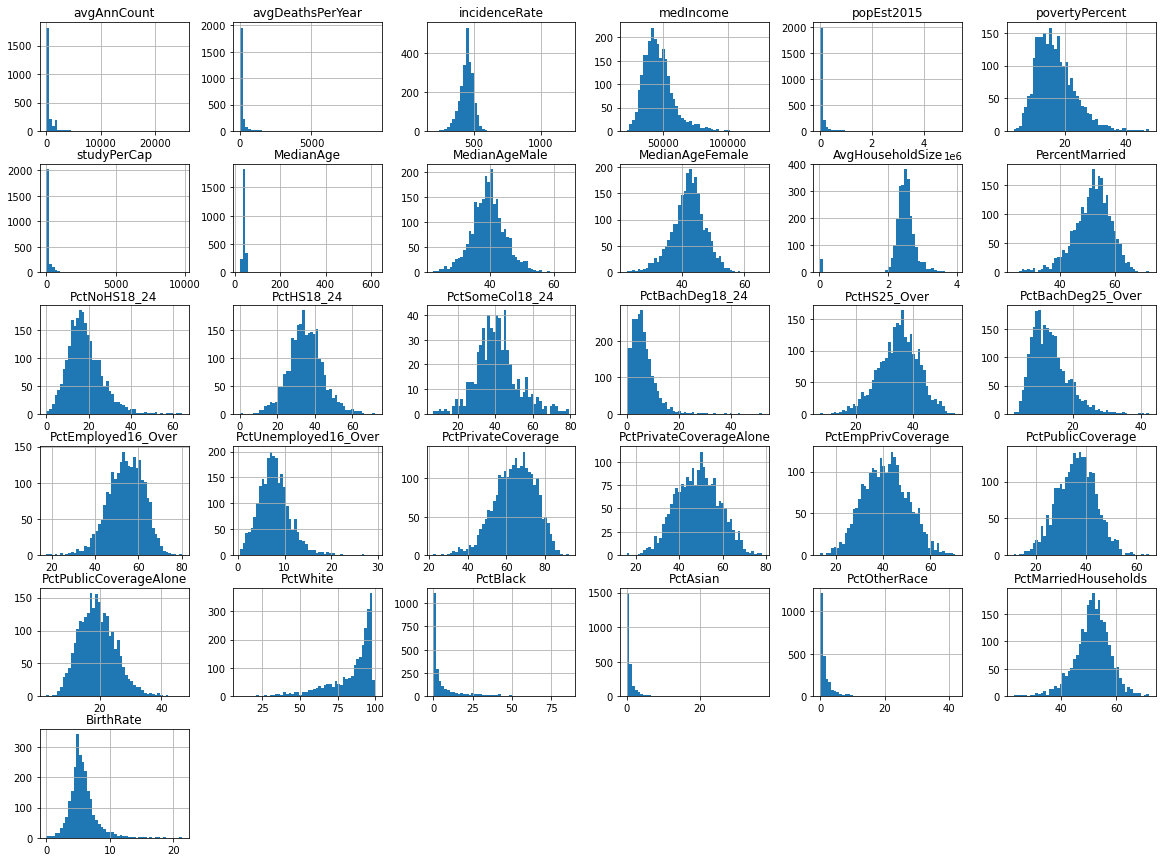

Sorted Correlations:
 PctBachDeg25_Over          0.491411
incidenceRate              0.443983
PctPublicCoverageAlone     0.439734
medIncome                  0.416607
povertyPercent             0.413260
PctHS25_Over               0.409915
PctEmployed16_Over         0.400317
PctPublicCoverage          0.391899
PctPrivateCoverage         0.382786
PctUnemployed16_Over       0.362612
PctPrivateCoverageAlone    0.355050
PctMarriedHouseholds       0.290645
PctBachDeg18_24            0.284566
PctHS18_24                 0.266285
PercentMarried             0.266153
PctEmpPrivCoverage         0.259006
PctBlack                   0.236380
PctSomeCol18_24            0.186140
PctOtherRace               0.182602
PctAsian                   0.181948
PctWhite                   0.174521
avgAnnCount                0.150019
popEst2015                 0.130122
avgDeathsPerYear           0.094048
PctNoHS18_24               0.090565
BirthRate                  0.088543
AvgHouseholdSize           0.045545
Median

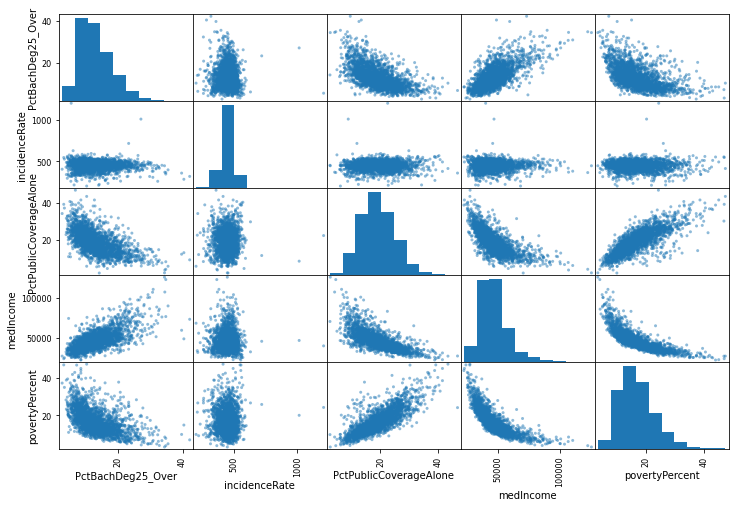

In [82]:
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

training_data = pd.read_csv(training_data_path)
targets = pd.read_csv(training_targets_path)

training_data.hist(bins=50, figsize=(20, 15))
plt.show()

correlations = training_data.corrwith(targets['TARGET_deathRate'])
sorted_correlations = correlations.abs().sort_values(ascending=False)
print('Sorted Correlations:\n', sorted_correlations)
print('Top 5 Features:\n', sorted_correlations.head(5))
scatter_matrix(training_data[sorted_correlations.head(5).index], figsize=(12, 8))
plt.show()

## Unsual Feature
The value for MedianAge feature is unusual. I have drawn a histogram specifically for this feature and we can see that in the histogram, there are bar chart plotted on value around 400 and 500, which is unusual for age value. Apparently, there are outliers in this feature and this need to be handled when creating the model later.

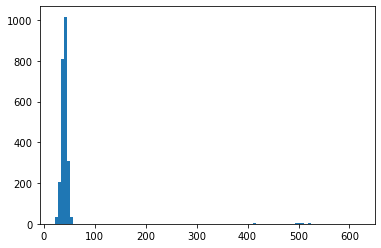

In [83]:
_=plt.hist(training_data["MedianAge"],bins=100)

## Top five features with strongest correlations to the targets
Based on the code above, the top five features are: PctBachDeg25_Over, incidenceRate, PctPublicCoverageAlone, medIncome, povertyPercent
## Comment on at least two sets of features that show visible correlations to each other.
PctBachDeg25_ and medianIncome positively correlated indicates that counties with more Bachelor graduates has higher median income. Next, povertyPercent is positively correlated with PctPublicCoverageAlone indicates that counties with higher level poverty have higher percentage of residents rely on only government-provided health coverage.

**Exercise 3.2**

Create an ML pipeline using scikit-learn (as demonstrated in the lab notebooks) to pre-process the training data. (5 marks)

In [84]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

Q1 = training_data['MedianAge'].quantile(0.25)
Q3 = training_data['MedianAge'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = ( training_data['MedianAge'] < lower_bound) | ( training_data['MedianAge'] > upper_bound)

training_data.loc[outliers, 'MedianAge'] = np.nan

pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    ('std_scaler', StandardScaler())
])
training_data_prepared = pipeline.fit_transform(training_data)

Before creating the ML pipeline, I remove the outliers from the MedianAge feature using Interquartile range method(IQR) to ensure that the model is not affected by the outliers. I conducted extensive research on how to remove the outliers in machine learning model and found out that IQR method is the most common and effecive method.

**Exercise 3.3**

Fit linear regression models to the pre-processed data using: Ordinary least squares (OLS), Lasso and Ridge models. Choose suitable regularisation weights for Lasso and Ridge regression and include a description in text of how they were chosen. In your submitted solution make sure you set the values for the regularisation weights equal to those you identify from your experiment(s). Quantitatively compare your results from all three models and report the best performing one. Report the overall performance of the best regression model identified. Include code for all steps above. (10 marks)

In [85]:
from sklearn.linear_model import LassoCV

alphas = [0.0001, 0.001,0.01, 0.1, 1, 10]

lasso_cv = LassoCV(alphas=alphas)

lasso_cv.fit(training_data_prepared, targets.values.ravel())

best_alpha = lasso_cv.alpha_
print("Suitable Regularisation Weights for Lasso Model:", best_alpha)

Suitable Regularisation Weights for Lasso Model: 0.1


In [86]:
from sklearn.linear_model import RidgeCV

alphas = [0.0001, 0.001,0.01, 0.1, 1, 10]

ridge_cv = RidgeCV(alphas=alphas)

ridge_cv.fit(training_data_prepared, targets.values.ravel())

best_alpha = ridge_cv.alpha_
print("Suitable Regularisation Weights for Ridge Model:", best_alpha)

Suitable Regularisation Weights for Ridge Model: 10.0


The suitable regularisation weight for Lasso and Ridge regression is chosen by conducting k-fold cross-validation method. For Lasso model, LassoCV is used to find the best alpha value while for Ridge model, RidgeCV is used to choose the best alpha value. They will perform cross validation automatically to find the suitable regularisation weights for models. <br>
Firstly, an array of alpha values is defined to be tested during cross-validation. Then, LassoCV and RidgeCV will test each alpha values by fitting the model to the data. lasso_cv.alpha_ and ridge_cv.alpha_ retrieves the best alpha values chosen by cross-validation. The alpha values will then be used for the Lasso and Ridge model later to train the dataset.

In [87]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score

ols_model=LinearRegression()
ols_model.fit(training_data_prepared, targets)
ols_predictions = ols_model.predict(training_data_prepared)
ols_mse = mean_squared_error(targets, ols_predictions)
ols_rmse = np.sqrt(ols_mse)

lasso_model = Lasso(alpha=0.1)  
lasso_model.fit(training_data_prepared, targets)
lasso_predictions = lasso_model.predict(training_data_prepared)
lasso_mse = mean_squared_error(targets, lasso_predictions)
lasso_rmse = np.sqrt(lasso_mse)

ridge_model = Ridge(alpha=10) 
ridge_model.fit(training_data_prepared, targets)
ridge_predictions = ridge_model.predict(training_data_prepared)
ridge_mse = mean_squared_error(targets, ridge_predictions)
ridge_rmse = np.sqrt(ridge_mse)

ols_scores = cross_val_score(ols_model, training_data_prepared, targets, scoring="neg_mean_squared_error", cv=10)
lasso_scores = cross_val_score(lasso_model, training_data_prepared, targets, scoring="neg_mean_squared_error", cv=10)
ridge_scores = cross_val_score(ridge_model, training_data_prepared, targets, scoring="neg_mean_squared_error", cv=10)

ols_rmse_scores = np.sqrt(-ols_scores)
lasso_rmse_scores = np.sqrt(-lasso_scores)
ridge_rmse_scores = np.sqrt(-ridge_scores)

def display_scores(scores):
    print('Scores:',scores)
    print('Mean:',scores.mean())
    print('Standard deviation:',scores.std())
    
ols_r2 = r2_score(targets, ols_predictions)
lasso_r2 = r2_score(targets, lasso_predictions)
ridge_r2 = r2_score(targets, ridge_predictions)

print("OLS R-squared:", ols_r2)
print("Lasso R-squared:", lasso_r2)
print("Ridge R-squared:", ridge_r2)
print()

print("Cross-Validation Scores for OLS Model:")
display_scores(ols_rmse_scores)
print()

print("Cross-Validation Scores for Lasso Model:")
display_scores(lasso_rmse_scores)
print()

print("Cross-Validation Scores for Ridge Model:")
display_scores(ridge_rmse_scores)
print()

# Split the dataset to training data and test data to further evaluate the model
X_train, X_test, y_train, y_test = train_test_split(training_data_prepared, targets, test_size=0.2, random_state=42)
ols_model.fit(X_train, y_train)
ols_predictions_test = ols_model.predict(X_test)
ols_mse_test = mean_squared_error(y_test, ols_predictions_test)
ols_rmse_test = np.sqrt(ols_mse_test)

lasso_model.fit(X_train, y_train)
lasso_predictions_test = lasso_model.predict(X_test)
lasso_mse_test = mean_squared_error(y_test, lasso_predictions_test)
lasso_rmse_test = np.sqrt(lasso_mse_test)

ridge_model.fit(X_train, y_train)
ridge_predictions_test = ridge_model.predict(X_test)
ridge_mse_test = mean_squared_error(y_test, ridge_predictions_test)
ridge_rmse_test = np.sqrt(ridge_mse_test)

print('RMSE of Each Model on Training Set: ')
print("OLS:", ols_rmse)
print("Lasso:", lasso_rmse)
print("Ridge:", ridge_rmse)
print()

print('RMSE of Each Model on Test Set: ')
print("OLS:", ols_rmse_test)
print("Lasso:", lasso_rmse_test)
print("Ridge:", ridge_rmse_test)
print()
print('Best performing model: Ridge model')


OLS R-squared: 0.5279687213686001
Lasso R-squared: 0.5242074258431111
Ridge R-squared: 0.527791106857999

Cross-Validation Scores for OLS Model:
Scores: [19.18398514 20.80520599 19.84183546 18.3812911  18.72600018 19.31328019
 19.09454869 20.49806842 17.15359122 19.89143504]
Mean: 19.2889241427846
Standard deviation: 1.0089393379983262

Cross-Validation Scores for Lasso Model:
Scores: [19.02969789 20.7488613  20.05063411 18.35181724 18.62434269 19.4277161
 19.09582553 20.33398398 17.13358421 19.95922666]
Mean: 19.275568970087654
Standard deviation: 1.0168759578060476

Cross-Validation Scores for Ridge Model:
Scores: [19.12758253 20.75276572 19.87622456 18.38114162 18.69192247 19.34835471
 19.09041577 20.45095192 17.15376697 19.88947797]
Mean: 19.276260424522373
Standard deviation: 1.0002733960742456

RMSE of Each Model on Training Set: 
OLS: 18.91114639266679
Lasso: 18.98634191236224
Ridge: 18.91470397269832

RMSE of Each Model on Test Set: 
OLS: 18.7117292959213
Lasso: 18.780021074305

## Best Performing model
OLS model has the highest R-squared value, followed by Ridge and Lasso model. Howver, the difference between the r-squared of ols and ridge model is very small. Cross validation is used to evaluate the performance of the models. Based on the mean of the scores, we observe that Lasso model has the lowest root mean squared error compared to OLS and Ridge model. Nonetheless, the difference of root mean squared error between Lasso and Ridge model is less than 0.001. Ridge model also has lowest standard deviation which indicates that the model performs consistently across all different subsets of the data. When evaluate the models with the test set, we can see that Lasso Model has the highest training and testing RMSE, which indicates it is the most underfitting model among the three models. Training and testing of OLS and RIdge models are very close, with a difference of less than 0.01, which means the accuracy of the models are quite similar. Hence, based on the overall performance of the models, we can conclude that Ridge model is the best performing while most consistent model across all the models.

## References<br>
Anon n.d. Lasso and Ridge Regression in Python Tutorial. Datacamp.com. [Online]. [Accessed 19 November 2023b]. Available from: https://www.datacamp.com/tutorial/tutorial-lasso-ridge-regression.<br>
Anon n.d. Sklearn.Linear_model.LassoCV. scikit-learn. [Online]. [Accessed 19 November 2023]. Available from: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoCV.html.<br>
Suresh, A. 2020. How to remove outliers for machine learning? - analytics Vidhya - medium. Analytics Vidhya. [Online]. [Accessed 19 November 2023]. Available from: https://medium.com/analytics-vidhya/how-to-remove-outliers-for-machine-learning-24620c4657e8.
The creation of machine learning pipeline nad its application is referred to the jupyter notebook provided in the course. I referred to COMP3611-ML-Pipeline_Part_1, COMP3611-ML-Pipeline_Part_2, and COMP3611-ML-Pipeline_Part_3 to complete exercise 3.